In [1]:
import torch.nn as nn
from GRU_pipeline import DataHolder, paths, dicDataset, GRUModel, pad_collate, HierarchicalDataset, Pipeline

DH = DataHolder(**paths)
#HD = HierarchicalDataset(DH)
#dl = HD.dataloader()

In [2]:
output = DH.make_train_test_datasets(test_size = .15, val_size = .17)
class_weights = output['class_weights']
openface_1  = output['datasets']['openface_1']
openface_2  = output['datasets']['openface_2']
opensmile_1 = output['datasets']['opensmile_1']
opensmile_2 = output['datasets']['opensmile_2']

Training on cpu
loss epoch 30: 2.990659
loss epoch 60: 2.729973
loss epoch 90: 2.637865
loss epoch 120: 2.602079
loss epoch 150: 2.588818
Early stop activated, stopped at epoch 151


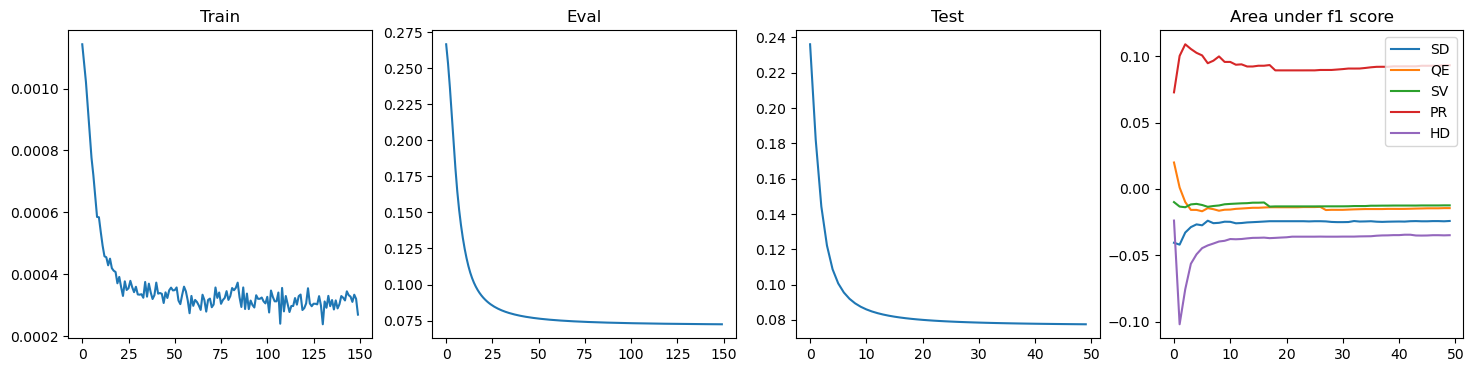

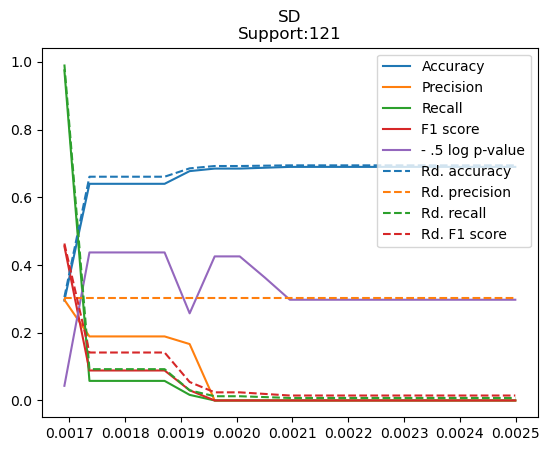

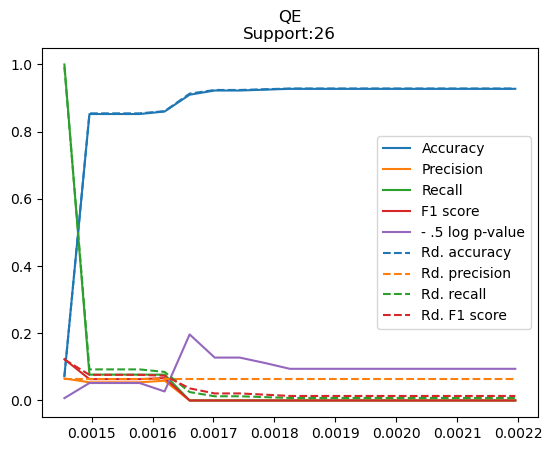

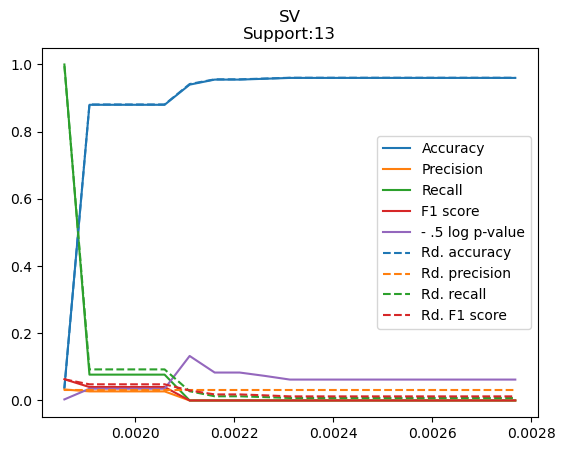

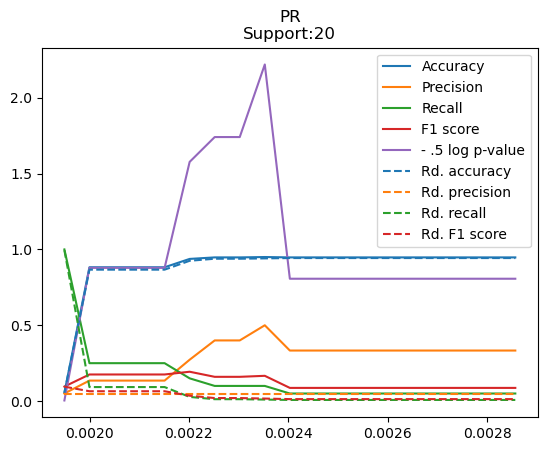

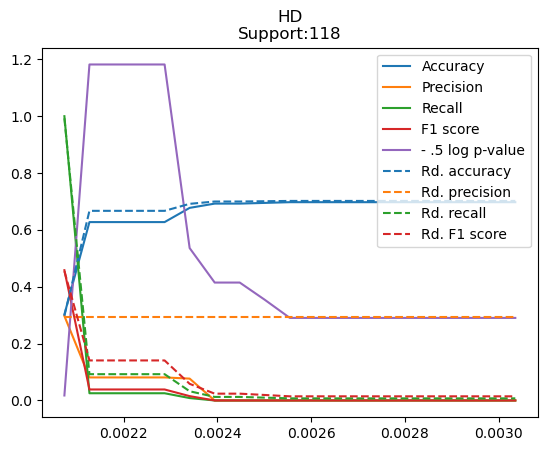

[-0.024137671081321373,
 -0.014448006825890928,
 -0.012376610195877553,
 0.09314624647205566,
 -0.03483970590957273]

In [7]:
model_args = {
    'input_dim':17,
    'hidden_dim':8,
    'layer_dim':3,
    'output_dim':5,
    'dropout_prob':.0
}

args={
    'model': GRUModel(**model_args),
    'features_1':openface_1,
    'features_2':openface_2,
    #'features_1':opensmile_1,
    #'features_2':opensmile_2,
    'criterion':nn.L1Loss()#weight=class_weights)
    #'criterion':nn.KLDivLoss(reduction='batchmean')
}
pipe = Pipeline(**args)
pipe.train(epoch=150,lr=1e-3, early_stop=True)
pipe.plot_losses()
pipe.eval_model(plot=True)